In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [8]:
os.makedirs("figures", exist_ok=True)

In [3]:
### Data loading

def load_data(filepath):

    try:
        df = pd.read_csv(filepath)
        # Check for standard Oxford Man columns
        if 'Symbol' in df.columns and 'rv5' in df.columns:
            # Clean up dates
            df['Date'] = pd.to_datetime(df['Unnamed: 0'] if 'Unnamed: 0' in df.columns else df.index, utc=True)
            df.set_index('Date', inplace=True)
            return df
        else:
            print("Columns 'Symbol' and 'rv5' exist")
            return None
    except FileNotFoundError:
        print(f"File {filepath} not found")

DATA_FILE = 'data/oxfordmanrealizedvolatilityindices.csv' 
full_data = load_data(DATA_FILE)

In [4]:
full_data.head(6)

,Unnamed: 0,Symbol,rv5_ss,close_time,rsv_ss,open_time,rk_parzen,rv5,rv10_ss,bv,close_price,rv10,open_price,rk_twoscale,medrv,bv_ss,open_to_close,nobs,rsv,rk_th2
Date,,,,,,,,,,,,,,,,,,,,
2000-01-03 00:00:00+00:00,2000-01-03 00:00:00+00:00,.AEX,0.000130,163015.0,0.000046,90101.0,0.000179,0.000130,0.000178,0.000100,675.44,0.000178,675.67,0.000103,0.000050,0.000100,-0.000340,1795.0,0.000046,0.000102
2000-01-04 00:00:00+00:00,2000-01-04 00:00:00+00:00,.AEX,0.000201,163016.0,0.000147,90416.0,0.000423,0.000201,0.000261,0.000207,642.25,0.000261,664.20,0.000199,0.000075,0.000207,-0.033606,1785.0,0.000147,0.000201
2000-01-05 00:00:00+00:00,2000-01-05 00:00:00+00:00,.AEX,0.000491,163016.0,0.000328,90016.0,0.000324,0.000491,0.000714,0.000361,632.31,0.000714,633.37,0.000325,0.000166,0.000361,-0.001675,1801.0,0.000328,0.000345
2000-01-06 00:00:00+00:00,2000-01-06 00:00:00+00:00,.AEX,0.000225,163002.0,0.000116,90016.0,0.000219,0.000225,0.000182,0.000258,624.21,0.000182,632.46,0.000218,0.000152,0.000258,-0.013130,1799.0,0.000116,0.000221
2000-01-07 00:00:00+00:00,2000-01-07 00:00:00+00:00,.AEX,0.000138,163016.0,0.000048,90046.0,0.000155,0.000138,0.000157,0.000130,644.86,0.000157,628.93,0.000126,0.000039,0.000130,0.025013,1798.0,0.000048,0.000123
2000-01-10 00:00:00+00:00,2000-01-10 00:00:00+00:00,.AEX,0.000109,163017.0,0.000062,90146.0,0.000086,0.000109,0.000126,0.000089,655.14,0.000126,651.82,0.000074,0.000032,0.000089,0.005081,1794.0,0.000062,0.000073


---
### rv5 – Standard 5‑minute realized variance:

$RV_{t}^{(5)} \sim \sum_{j=1}^{M} r_{t,j}^2$

with, $ r_{t,j} = \log\left(\frac{P_{t,j}}{P_{t,j-1}}\right), \quad j = 1, \dots, M$ 

where, $P_{t,j}$ = price at 5-minute interval $j$ on day $t$.

Realized volatility: $\sigma_{t}^{(5)} = \sqrt{RV_{t}^{(5)}}$

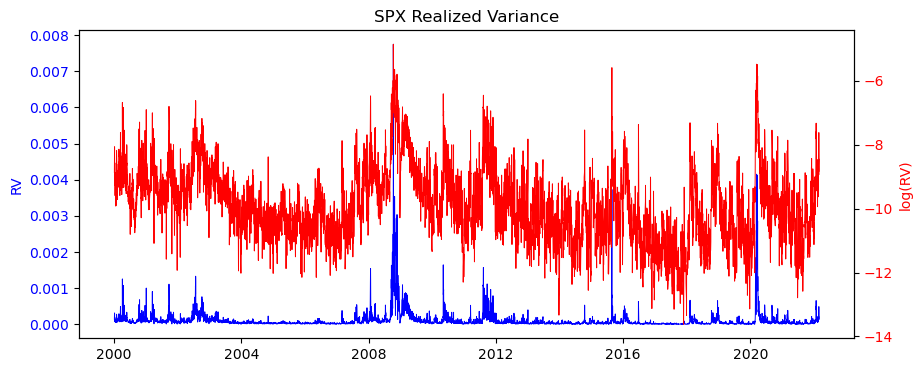

In [5]:
### Plot SPX Realised Volatility
###-------------------------------
# Filter for SPX and get Realized Variance (using rv5)
spx_data = full_data[full_data['Symbol'] == '.SPX'].copy()
# rv_col = 'rk_th2' 
rv_col = 'rv5'
spx_rk = spx_data[rv_col]

# plt.figure(figsize=(10,4))
# plt.plot(spx_rk.index, spx_rk, color='tab:blue', linewidth=0.7)
# plt.title(' SPX Realized Variance')
# plt.ylabel('RV')
# plt.xlabel('Year')
# plt.show()

# plt.figure(figsize=(10,4))
# plt.plot(spx_rk.index, np.log(spx_rk), color='tab:blue', linewidth=0.7)
# plt.title('Log of SPX Realized Variance')
# plt.ylabel('log(RV)')
# plt.xlabel('Year')
# plt.show()

fig, ax1 = plt.subplots(figsize=(10,4))

ax1.plot(spx_rk.index, spx_rk, 'b-', linewidth=0.7)  # Realised variance
# ax1.plot(spx_rk.index, np.sqrt(spx_rk), 'b-', linewidth=0.7) # Realised volatility
ax1.set_ylabel('RV', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(spx_rk.index, np.log(spx_rk), 'r-', linewidth=0.7) # Realised variance
# ax2.plot(spx_rk.index, np.log(np.sqrt(spx_rk)), 'r-', linewidth=0.7) # Realised volatility
ax2.set_ylabel('log(RV)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('SPX Realized Variance')
plt.xlabel('Year')
# plt.savefig("fig_1.png", dpi=200, bbox_inches='tight', 
#             pad_inches=0.1, facecolor='white', edgecolor='none')

plt.show()